# Visualizing the spectra
This notebook prints the available targets, and demonstrates some plotting

In [5]:
from spectroscopy.plotting_utils import plot_raw_spectra, plot_zoom, plot_spectral_features, plot_residuals_from_mean
from spectroscopy.spectral_features import SpectralFeature
from spectroscopy.spectrum_loader import SpectrumLoader

from pathlib import Path

DATA_PATH = Path.cwd() / "data"
FITS_PATH = DATA_PATH / "fits"
OBSERVATIONS_PATH = DATA_PATH / "observations.csv"
spectrum_loader = SpectrumLoader(fits_path=FITS_PATH, observations_path=OBSERVATIONS_PATH)

def print_targets():
    print("Available Spectra:")
    for target_name in spectrum_loader.target_list:
        print(f"\t* {target_name}: {spectrum_loader.get_available_spectra_count(target_name)}")

print_targets()

Available Spectra:
	* BECet: 6
	* EXCet: 3
	* HNPeg: 3
	* V383Lac: 3
	* V453And: 3
	* V774Tau: 3
	* V834Tau: 3
	* V889Her: 3


# Plot all spectra of target
We did 3 exposures for each target. So, each target has 3 spectra. 

In [6]:
_target = "V834Tau"
_spectra = spectrum_loader.get_spectra(_target)

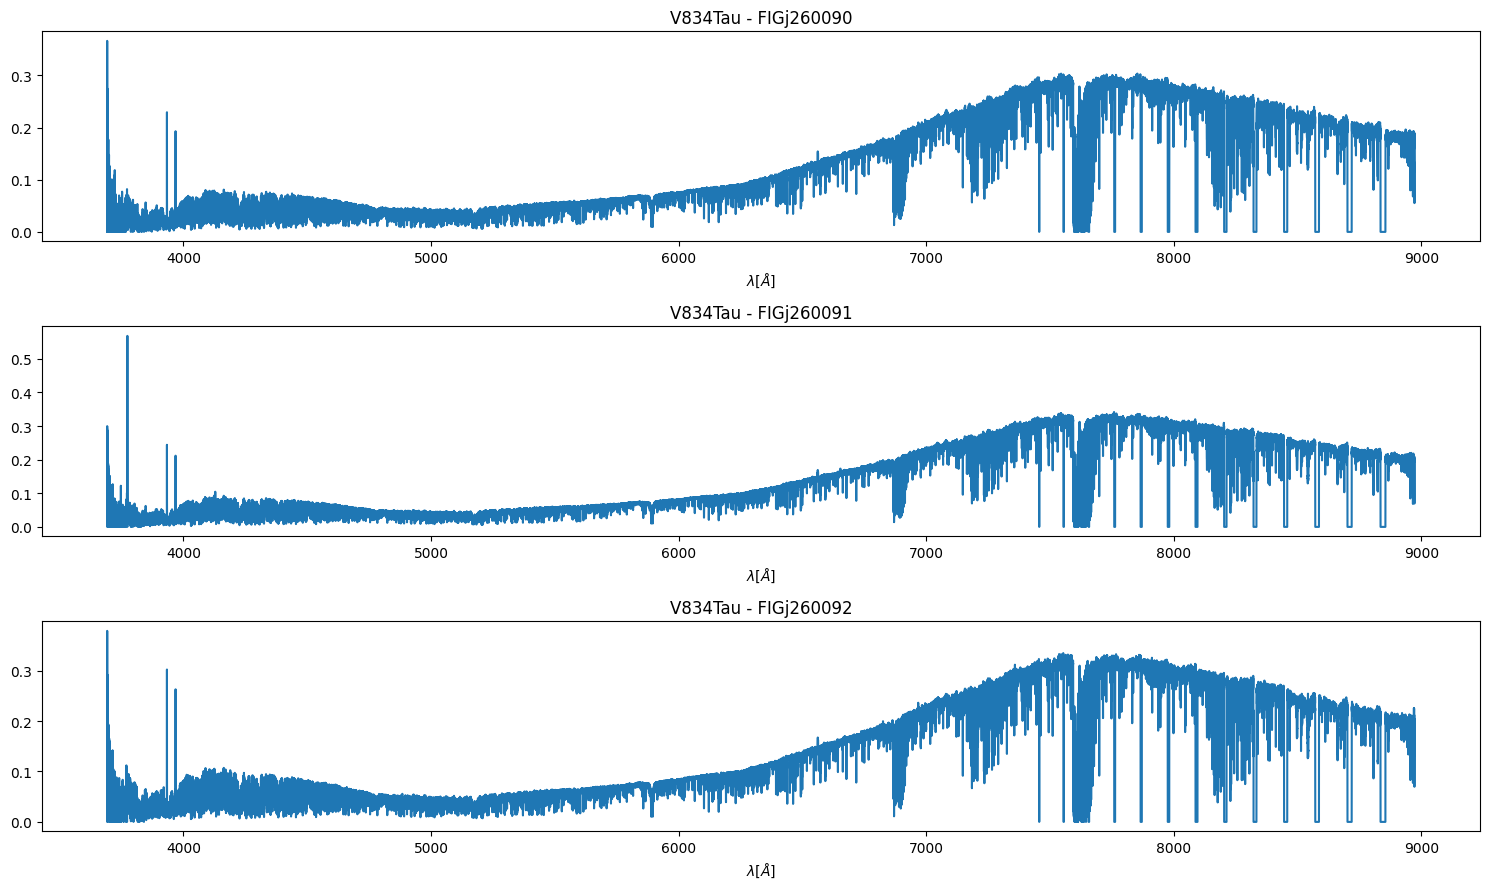

In [7]:
plot_raw_spectra(_spectra)

# Calculate mean spectra and plot residuals
Let's have a look at how the mean spectra look like, and their residuals

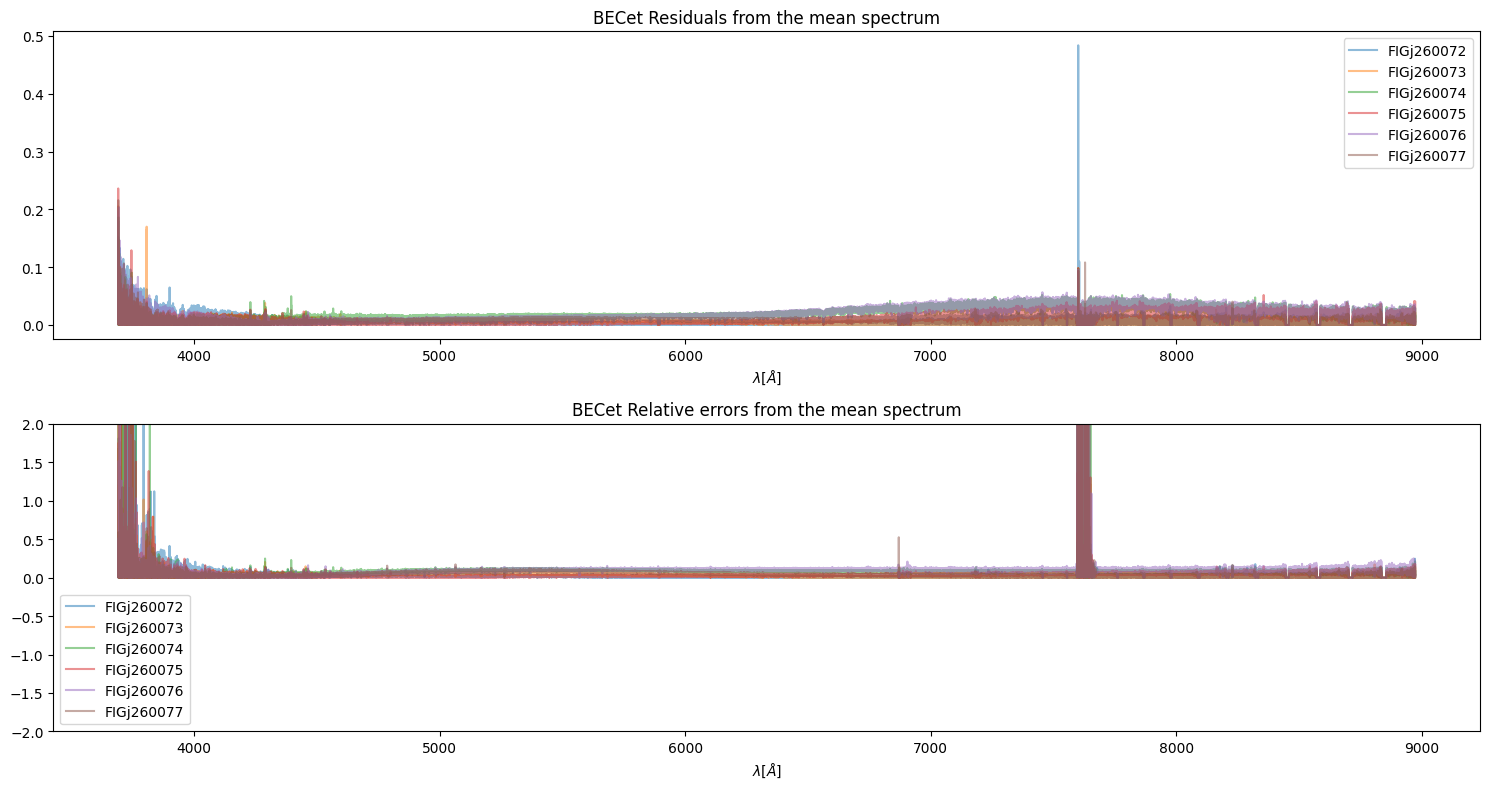

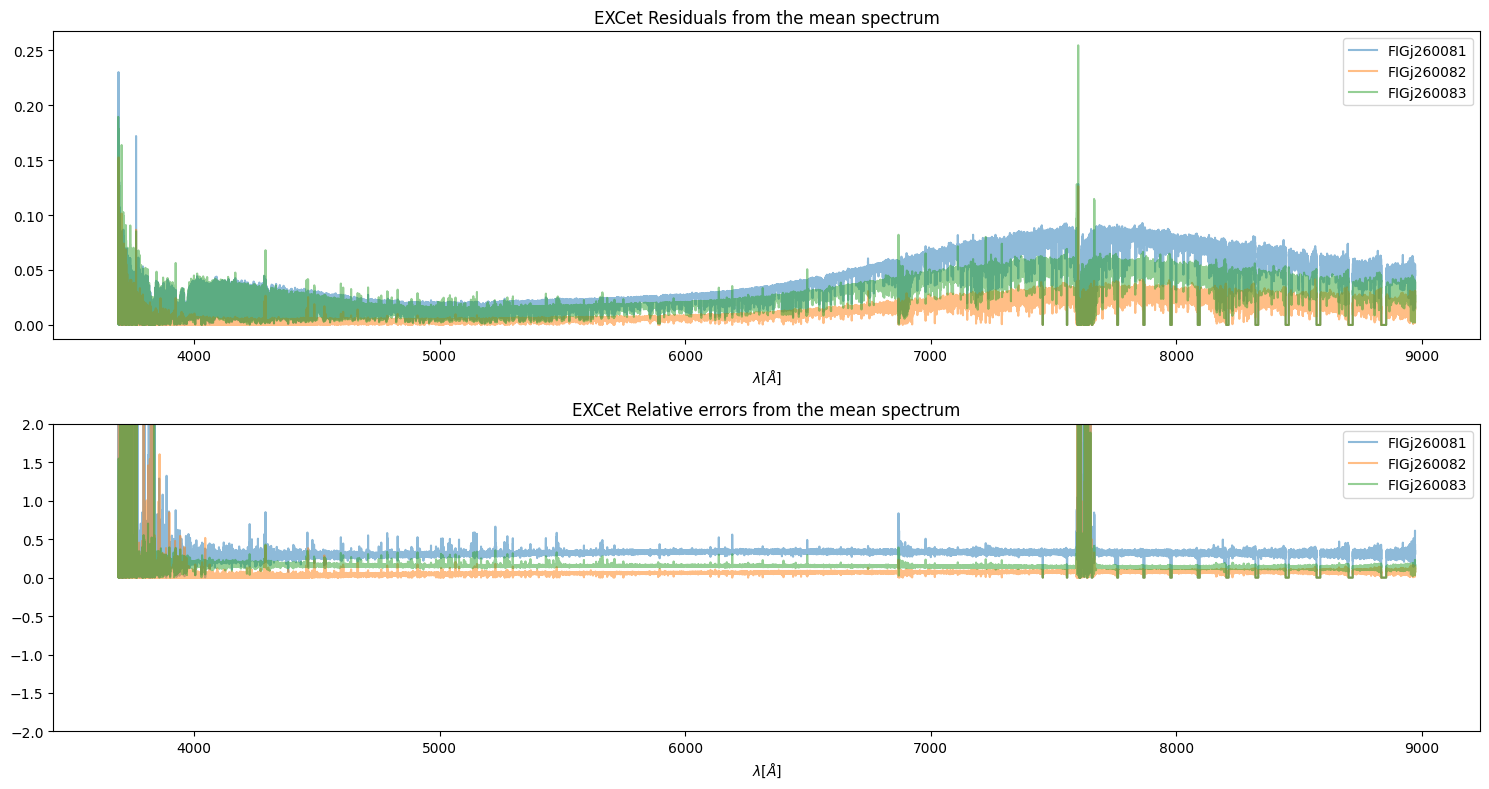

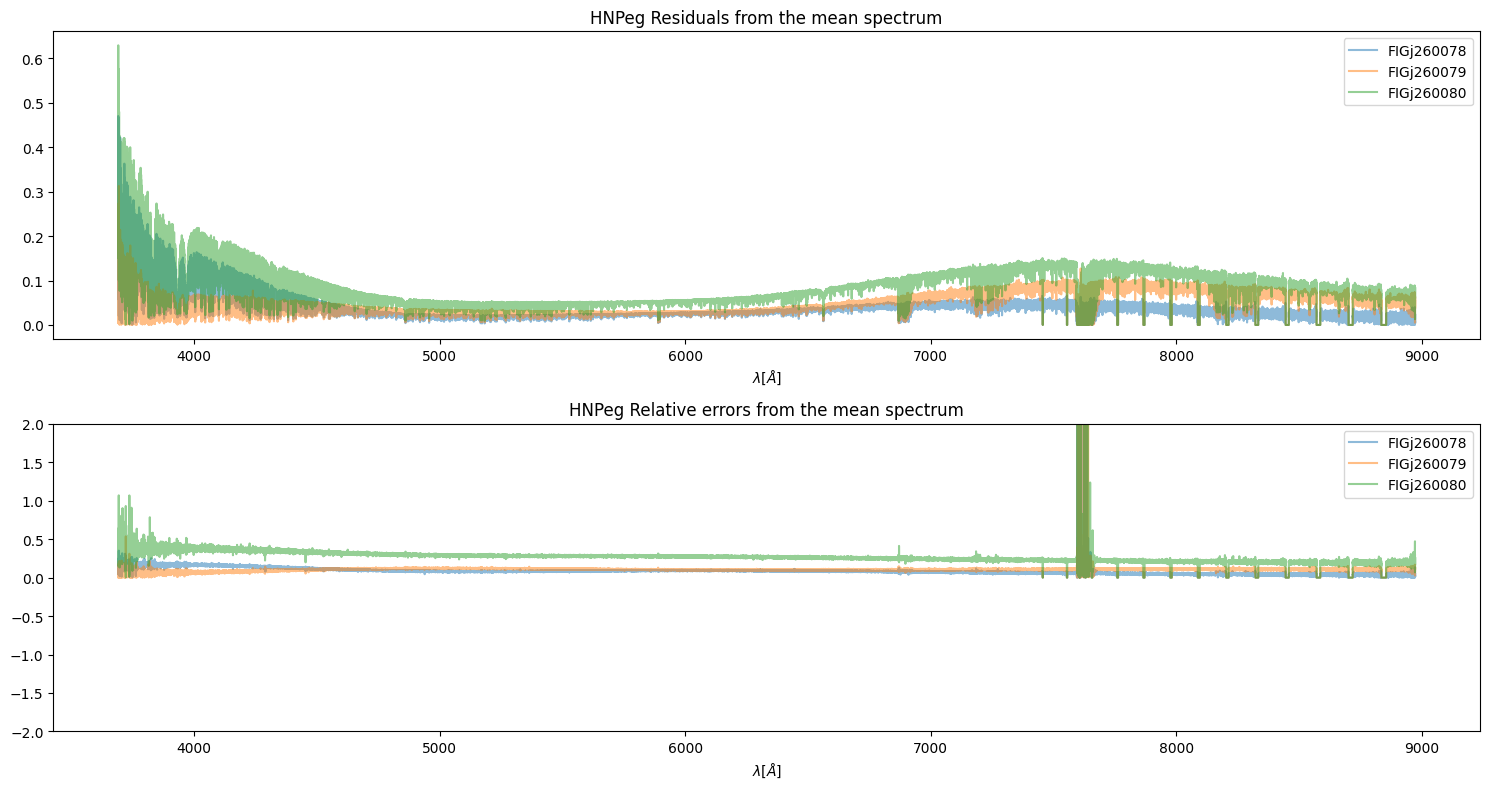

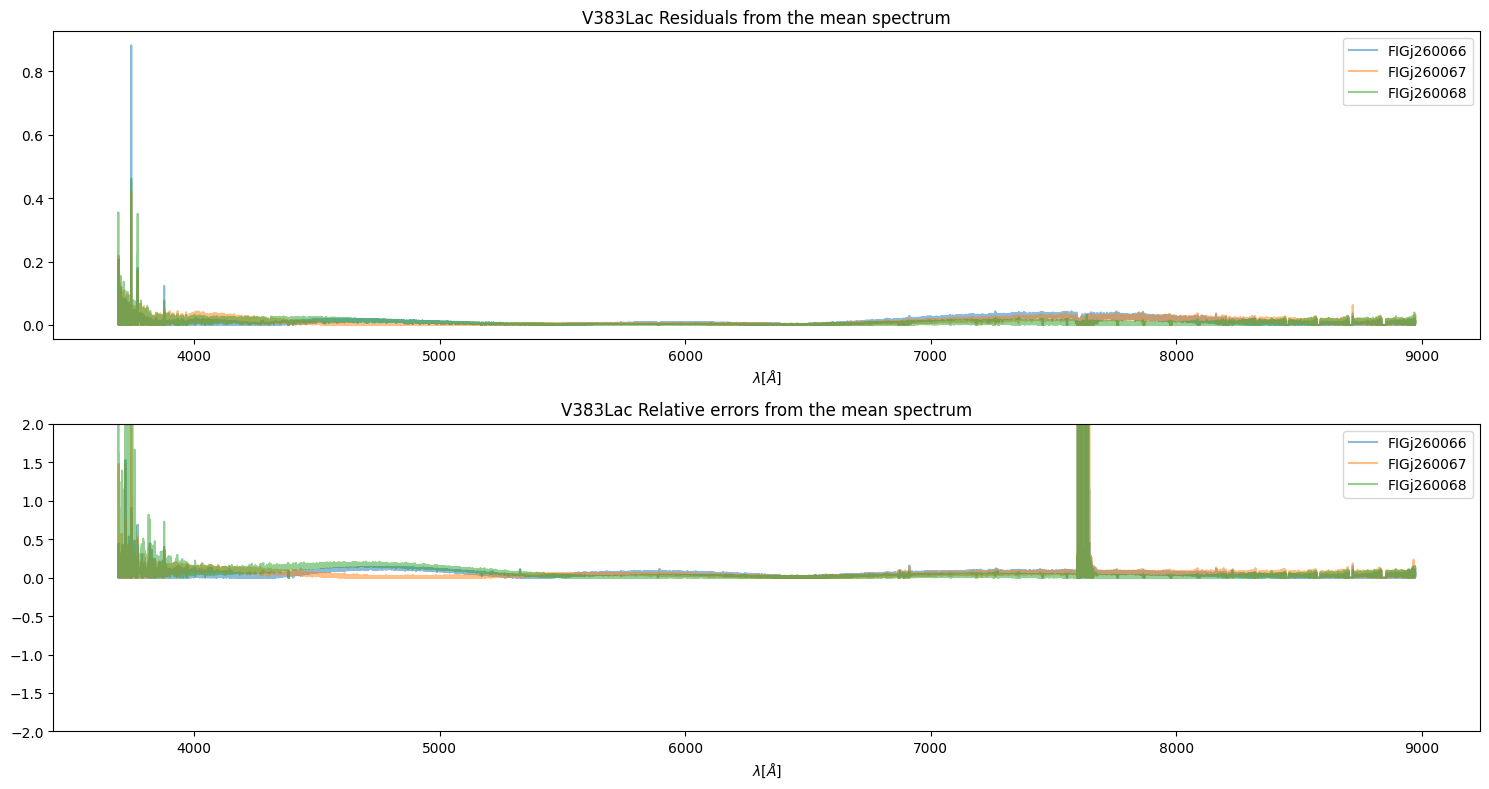

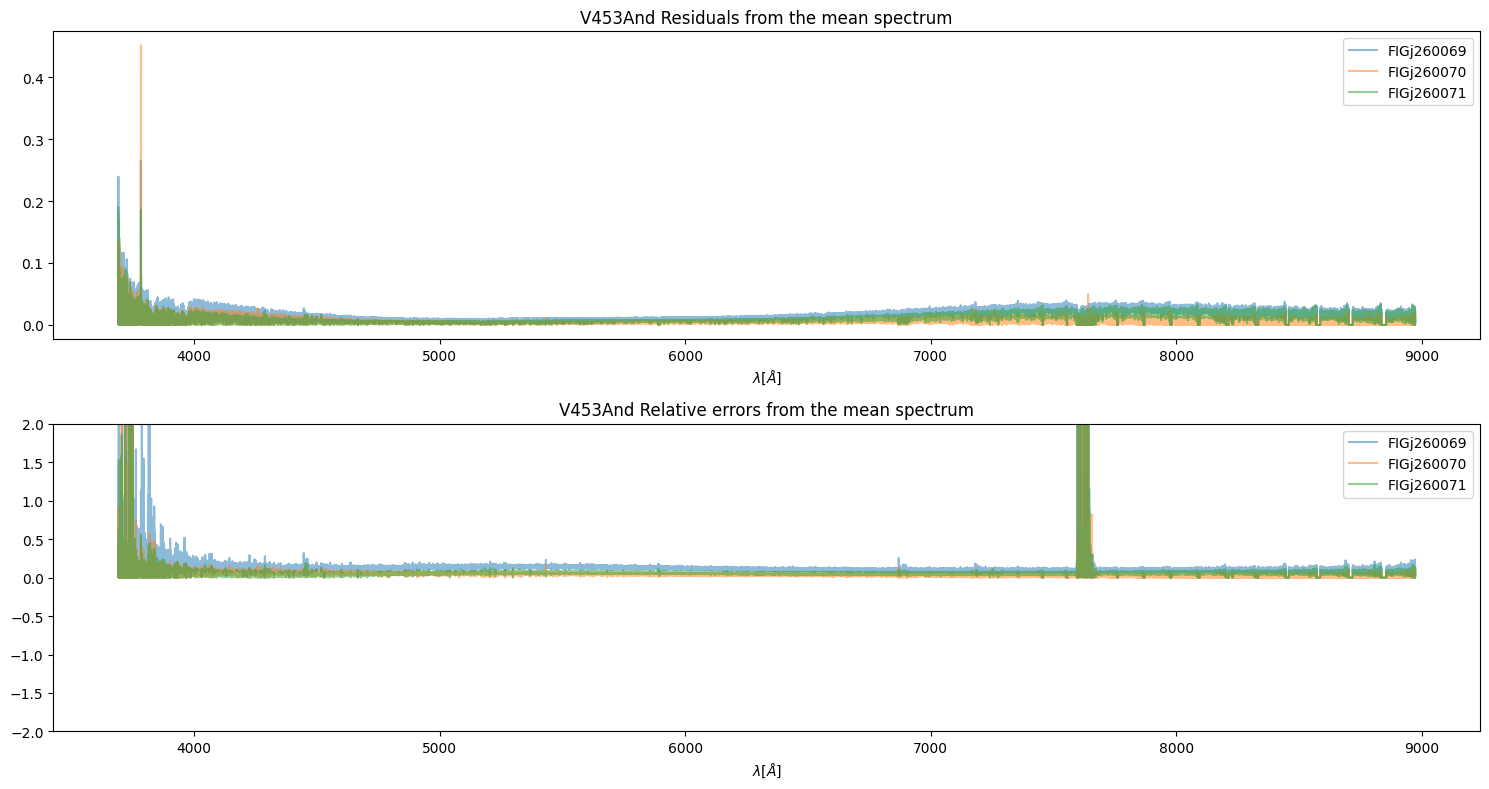

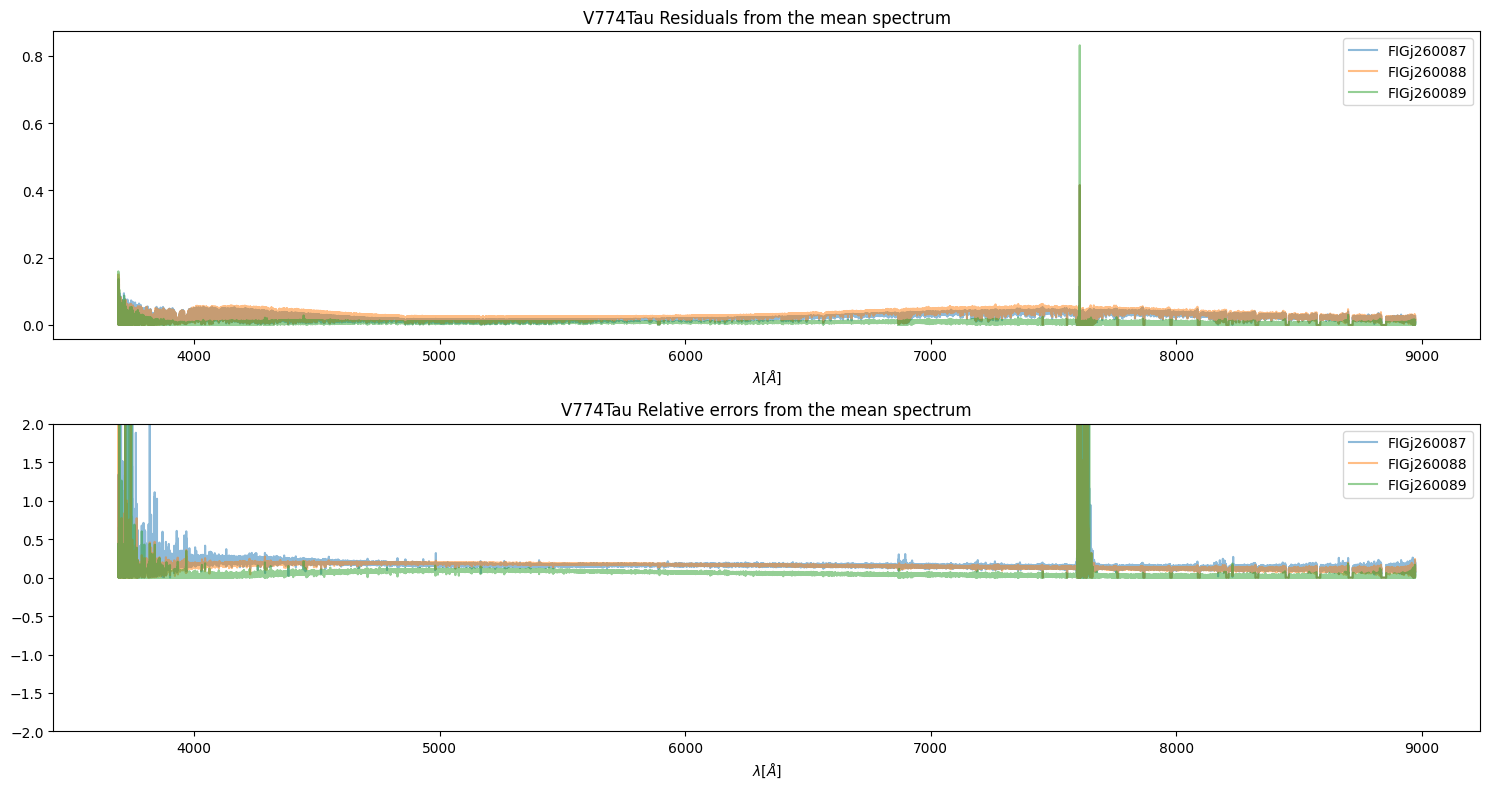

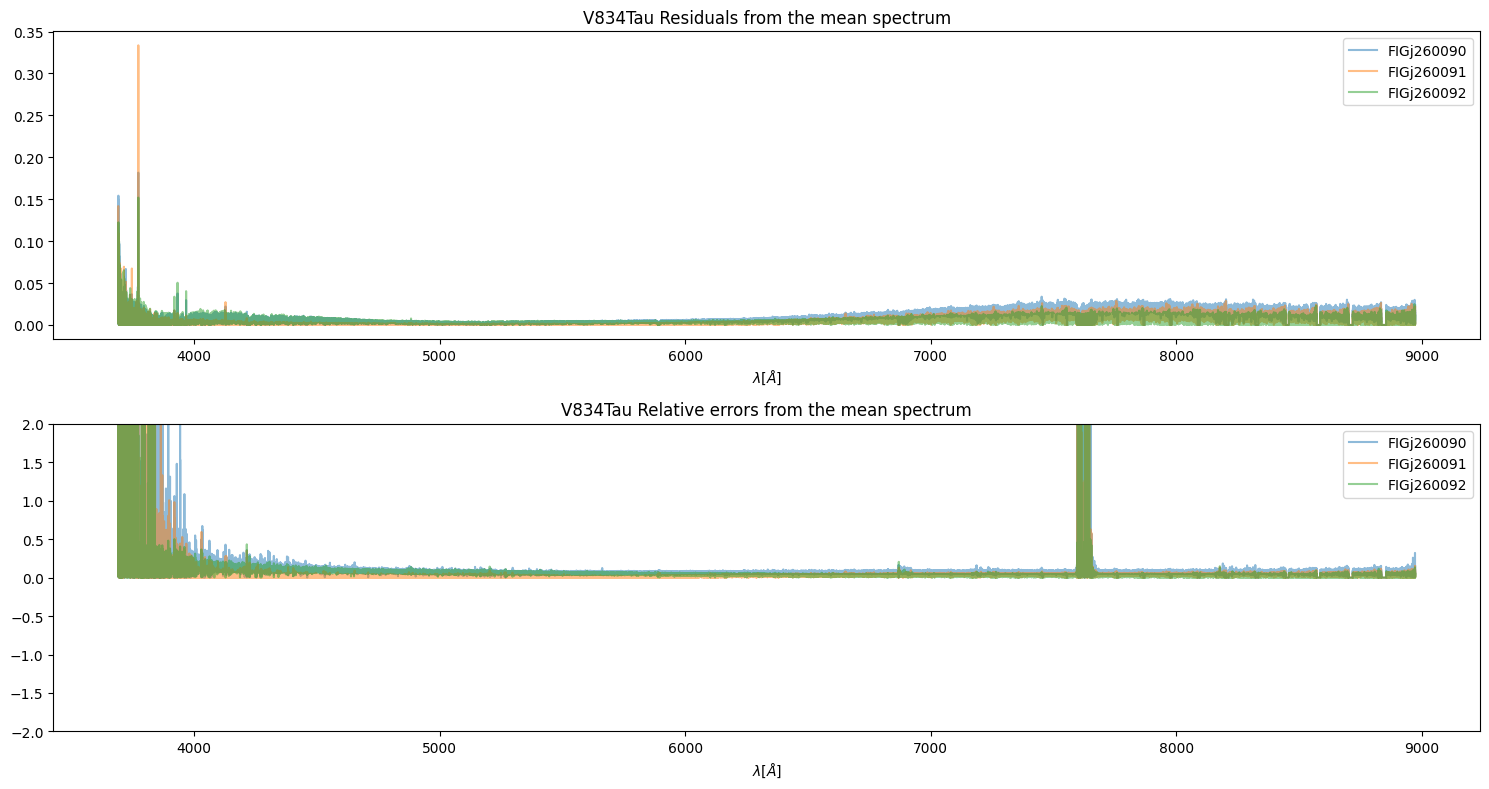

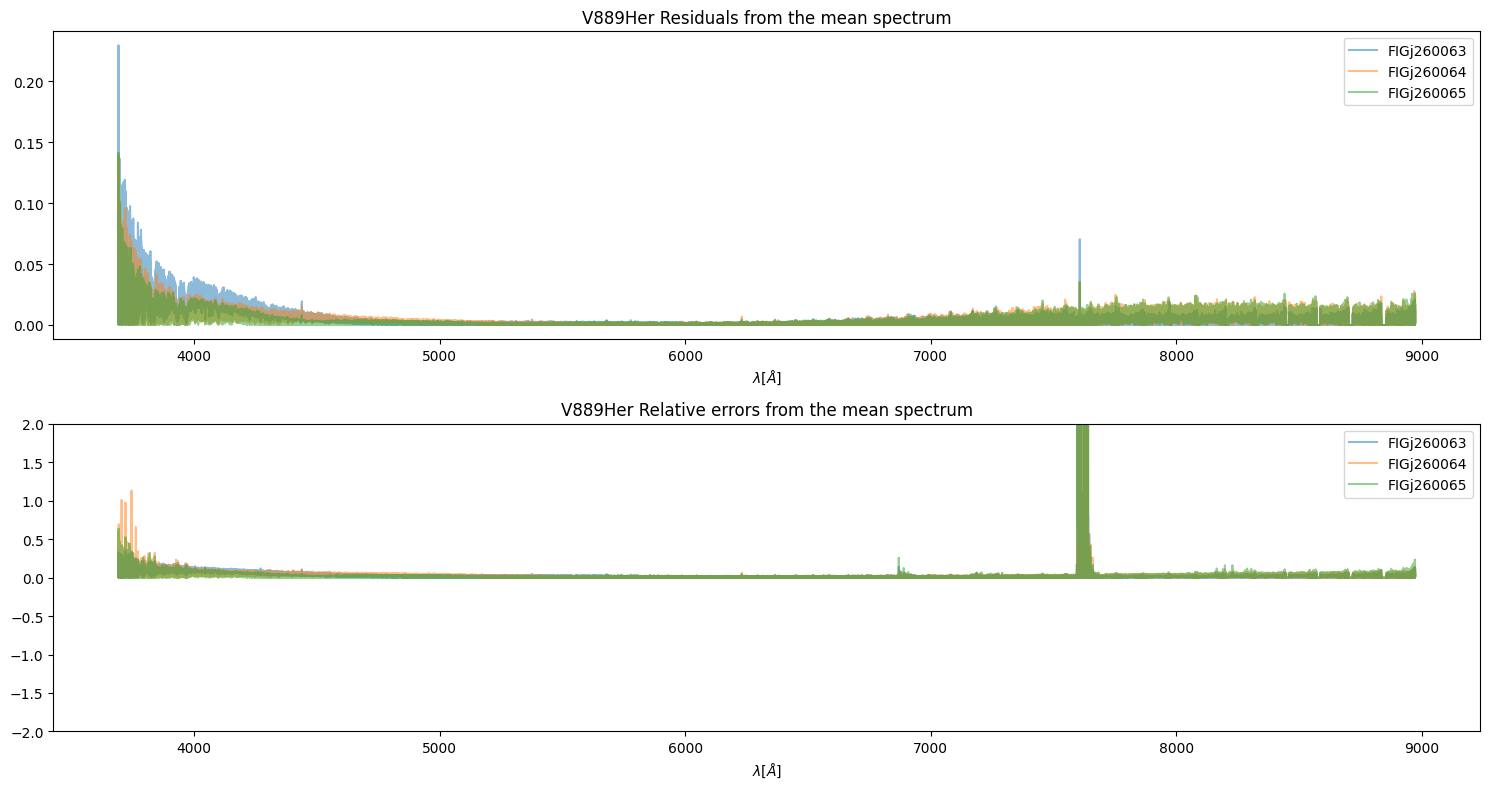

In [8]:
for target in spectrum_loader.target_list:
    plot_residuals_from_mean(spectrum_loader.get_spectra(target))

# Zoom in 
Demonstrates how to zoom in into a specific part of the spectra

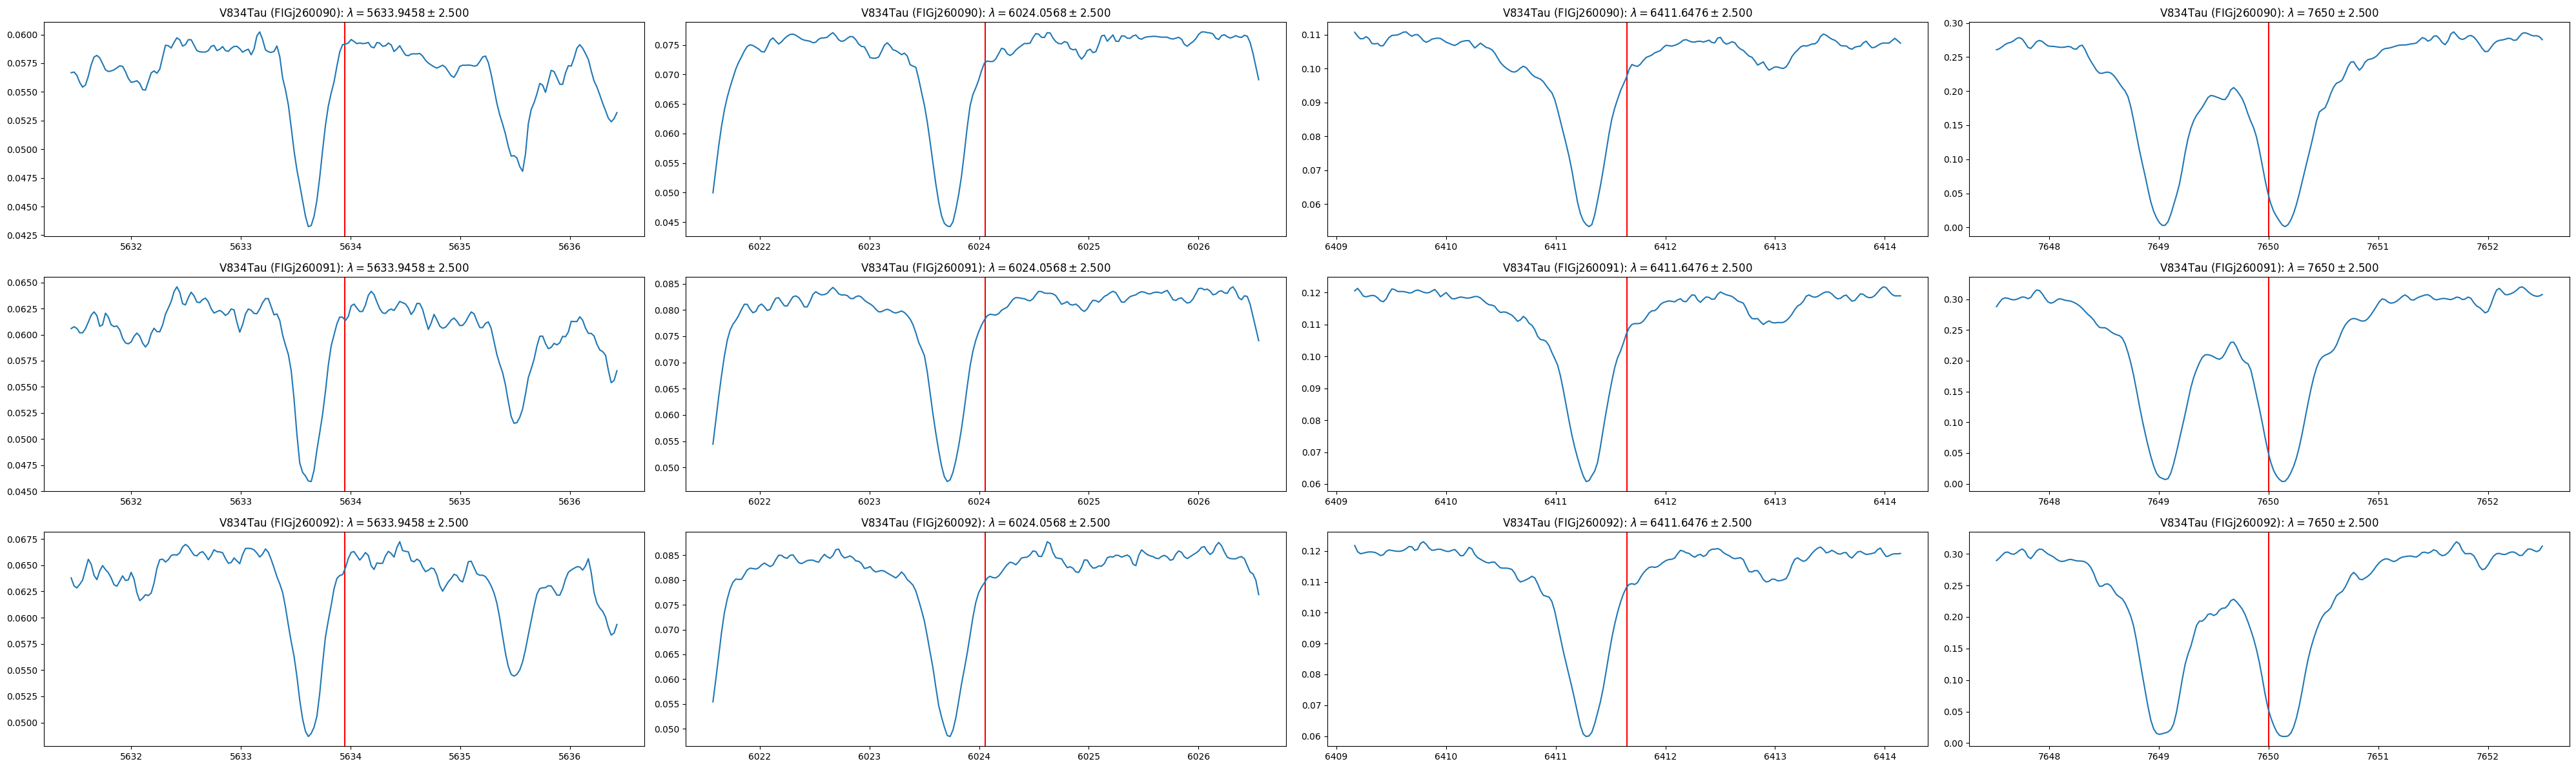

In [9]:
_wlist = [5633.9458, 6024.0568, 6411.6476, 7650] 
_width = 5
plot_zoom(_spectra, _wlist, _width)

## With Smoothing
By specifying a smoothing coefficient, the spectra can be smoothed. It's useful for removing noise before fitting for $v_{rad}$

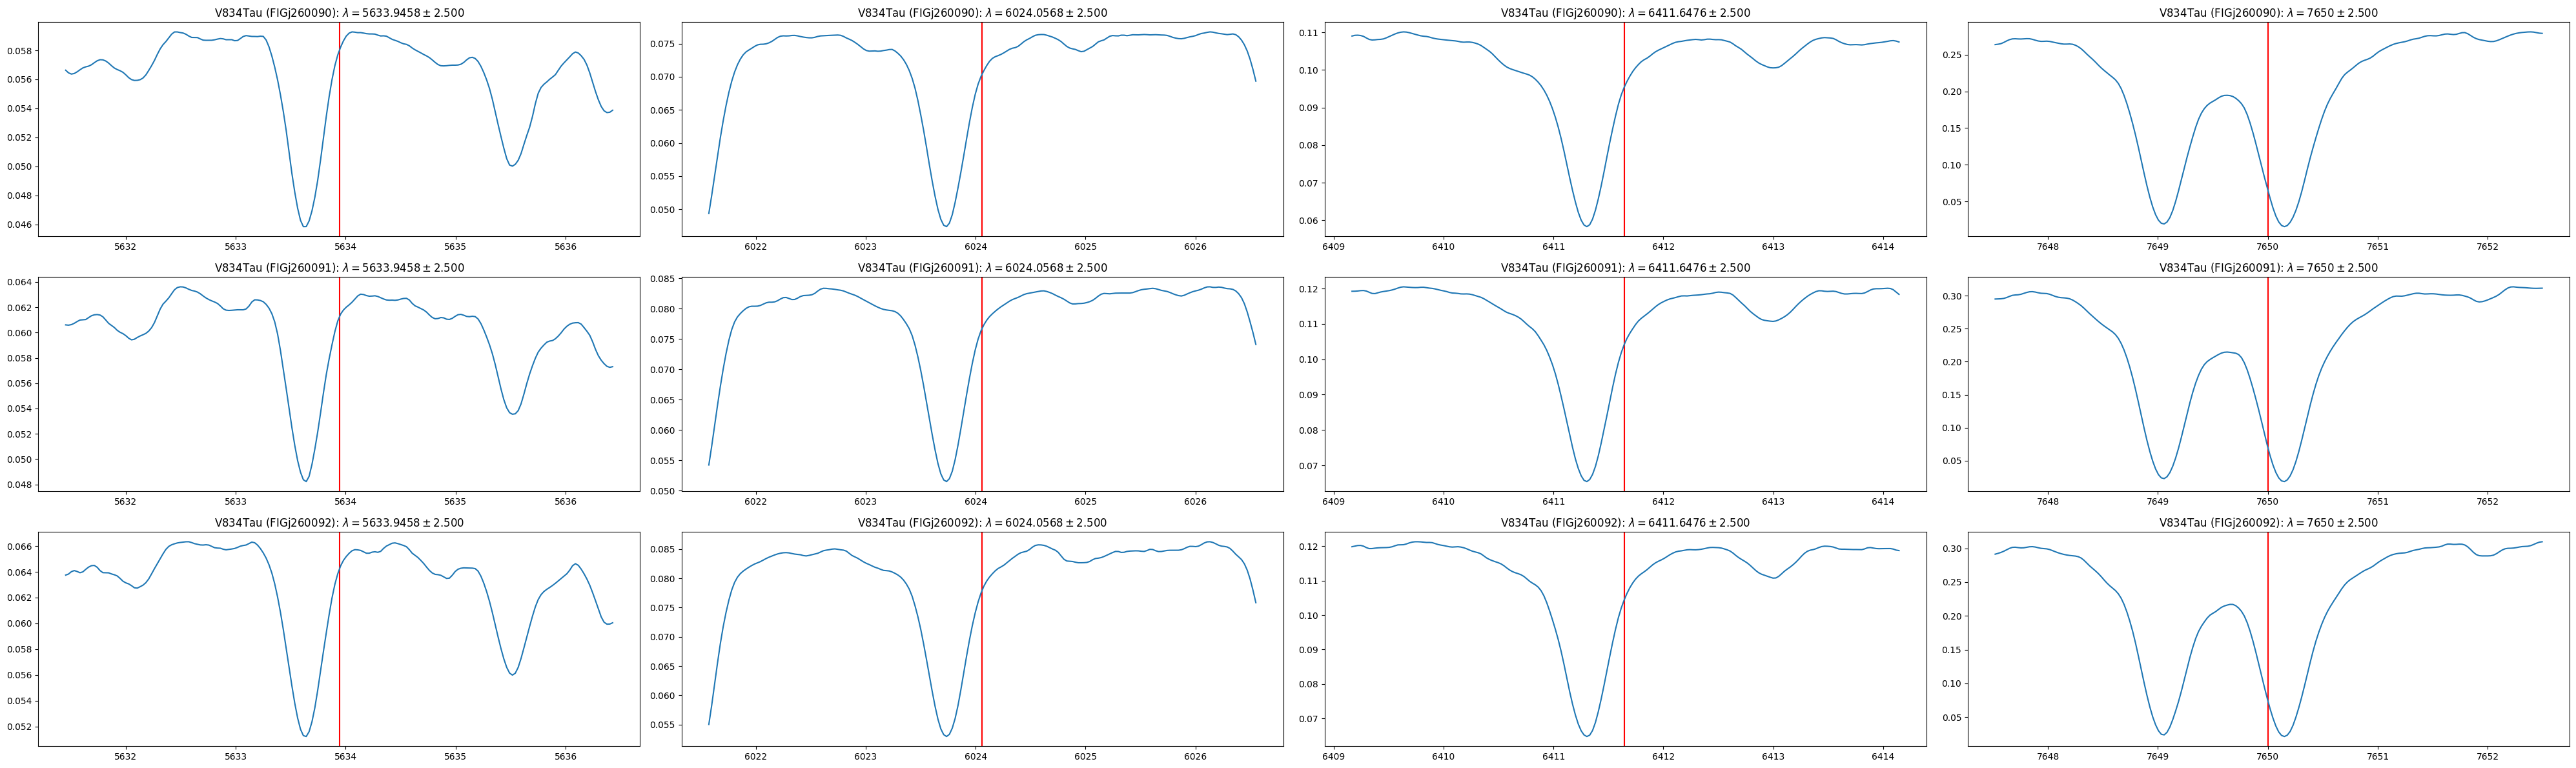

In [10]:
_smooth_periods = 10 
plot_zoom(_spectra, _wlist, _width, _smooth_periods)

# Plot spectral features all at once, with mirror spectrum

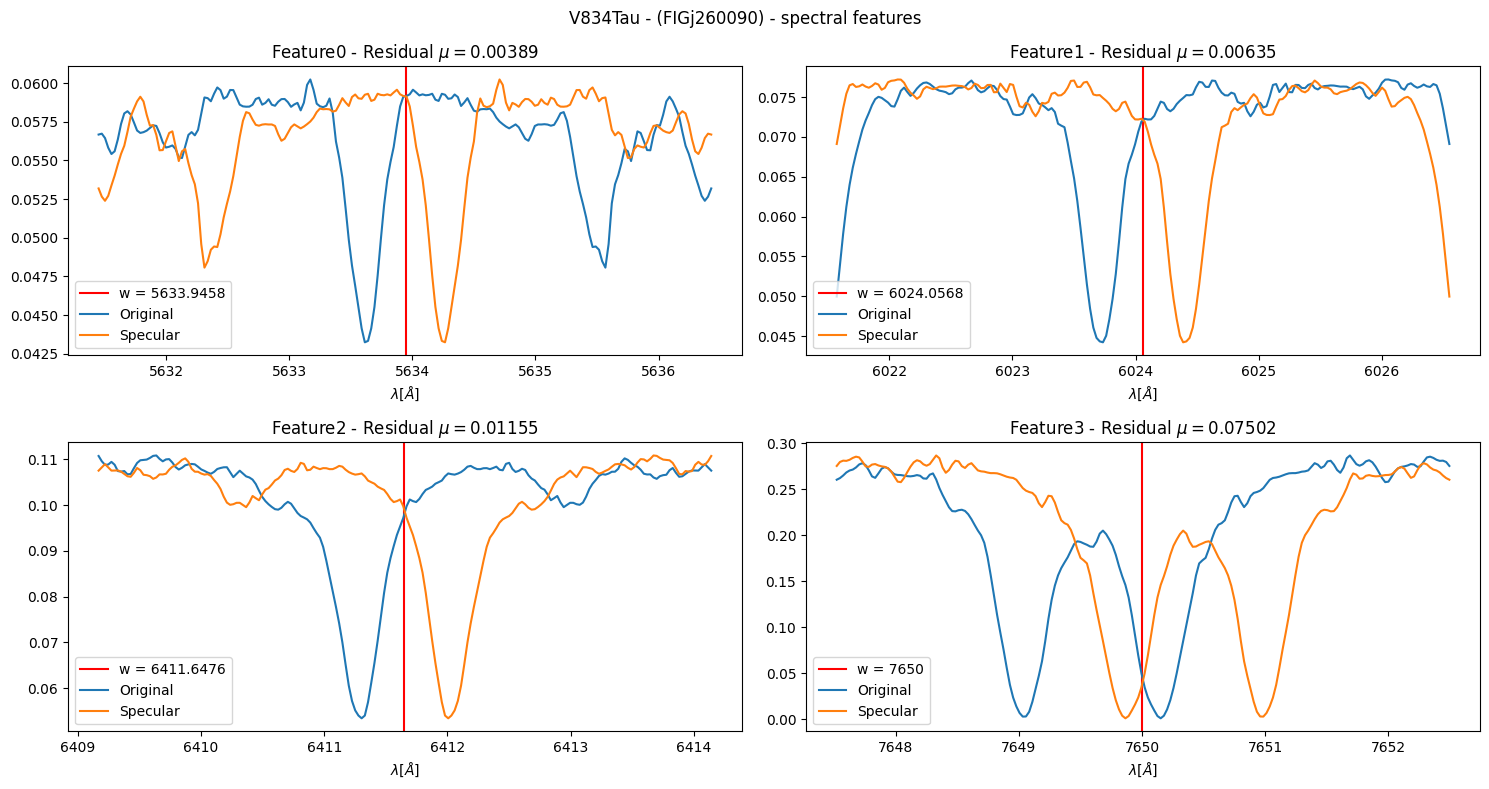

In [11]:
_spectral_features = [SpectralFeature(f"Feature{i}", w, _width) for i, w in enumerate(_wlist)]
plot_spectral_features(_spectra[0], _spectral_features)

## With Smoothing

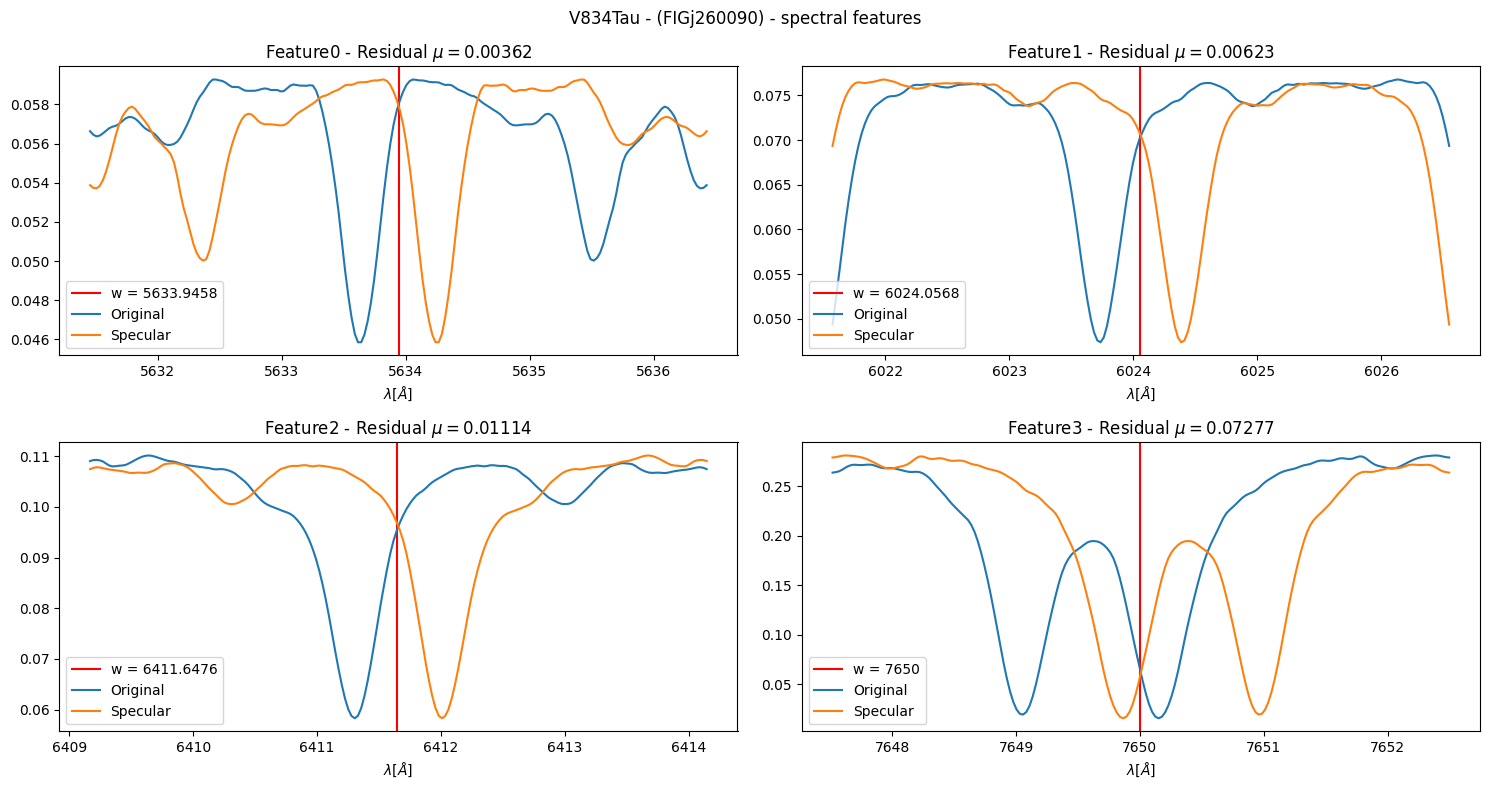

In [12]:
plot_spectral_features(_spectra[0], _spectral_features, _smooth_periods)